# DMSR CASE STUDY 9: ANOMALY DETECTION

**Project Goal:** Detecting significant deviations from normal behaviour in credit card transactions.


## **Data Source**

The dataset for the research work was obtained from Kaggle which is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.


The data was generated using Sparkov Data Generation | Github tool created by Brandon Harris. This simulation was run for the duration - 1 Jan 2019 to 31 Dec 2020. 

Reference link to dataset: https://www.kaggle.com/datasets/kartik2112/fraud-detection


**Acknowledgements on dataset:**

*   Brandon Harris 



NB: During EDA we realized the data had no missing/null values. It was manipulated by the group members to create missing values to enable cleaning as per the case study requirements.

## **Details of the attributes in the dataset**

*  index - Unique Identifier for each row
*  transdatetrans_time - Transaction DateTime
*  cc_num - Credit Card Number of Customer
*  merchant - Merchant Name
*  category - Category of Merchant
*  amt - Amount of Transaction
*  first - First Name of Credit Card Holder
*  last - Last Name of Credit Card Holder
*  gender - Gender of Credit Card Holder
*  street - Street Address of Credit Card Holder
*  city - City of Credit Card Holder
*  state - State of Credit Card Holder
*  zip - Zip of Credit Card Holder
*  lat - Latitude Location of Credit Card Holder
*  long - Longitude Location of Credit Card Holder
*  city_pop - Credit Card Holder's City Population
*  job - Job of Credit Card Holder
*  dob - Date of Birth of Credit Card Holder
*  trans_num - Transaction Number
*  unix_time - UNIX Time of transaction
*  merch_lat - Latitude Location of Merchant
*  merch_long - Longitude Location of Merchant
*  is_fraud - Fraud Flag <--- Target Class


## **Importing the Libraries needed for Data Cleansing, Exploration, Transformation and Analysis**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import mean_absolute_error

from datetime import datetime, date
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
sns.set(rc = {'figure.figsize':(15,8)})
from sklearn.linear_model import LassoCV

#logistic regression
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from imblearn import under_sampling, over_sampling, combine
from sklearn.decomposition import PCA
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

## **Uploading the data set & loading it into a pandas data frame**

This step converts the dataset into defined rows and columns.

In [2]:
#Upload the dataset

df = pd.read_csv('/Users/nalyaka/Downloads/fraudTrain(1).csv',sep=',')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01/01/2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01/01/2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01/01/2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01/01/2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01/01/2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,10/03/2020 16:07,6.011980e+15,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,F,05561 Farrell Crescent,...,39.0305,-76.5515,92106,"Accountant, chartered certified",28/05/1943,45ecd198c65e81e597db22e8d2ef7361,1362931649,38.779464,-76.317042,0
1048571,1048571,10/03/2020 16:07,4.839040e+15,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,F,043 Hanson Turnpike,...,41.1826,-92.3097,1583,Geochemist,28/06/1999,c00ce51c6ebb7657474a77b9e0b51f34,1362931670,41.400318,-92.726724,0
1048572,1048572,10/03/2020 16:08,5.718440e+11,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,F,005 Cody Estates,...,38.2507,-85.7476,736284,Engineering geologist,02/04/1952,17c9dc8b2a6449ca2473726346e58e6c,1362931711,37.293339,-84.798122,0
1048573,1048573,10/03/2020 16:08,4.646850e+18,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,F,576 House Crossroad,...,40.7320,-73.1000,4056,Film/video editor,25/06/1990,5ca650881b48a6a38754f841c23b77ab,1362931718,39.773077,-72.213209,0


In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01/01/2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01/01/2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01/01/2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01/01/2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01/01/2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


## **Data Exploration Analysis**

This step will give more insight into the data set in terms of descriptive statistics which will guide on the appropriate and best data cleansing techniques and tools to apply on the data.

In [4]:
#Read the first 5 rows of the data set

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,01/01/2019 00:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,01/01/2019 00:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,01/01/2019 00:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,01/01/2019 00:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,01/01/2019 00:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
#Break down the total number of rows & columns in the dataset

df.shape

(1048575, 23)

The dataset has 1,048,575 records and 23 attributes.

### **Data Cleaning**

In [6]:
#Get more information about the dataset i.e it summarizes the null count and data types of the variables in the data set

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048569 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [7]:
#Check for missing values in the dataset

df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      6
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      1
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
# Check the percentage of missing values identified from the above step

df.isnull().mean() * 100


Unnamed: 0               0.000000
trans_date_trans_time    0.000000
cc_num                   0.000000
merchant                 0.000000
category                 0.000000
amt                      0.000572
first                    0.000000
last                     0.000000
gender                   0.000000
street                   0.000000
city                     0.000000
state                    0.000000
zip                      0.000000
lat                      0.000000
long                     0.000000
city_pop                 0.000000
job                      0.000000
dob                      0.000095
trans_num                0.000000
unix_time                0.000000
merch_lat                0.000000
merch_long               0.000000
is_fraud                 0.000000
dtype: float64

There are 6 missing values in the 'amt' attribute and 1 missing value in the 'dob' attribute. The percentage of missing values in 'amt' and 'dob' attributes are really negligible thus deleting these rows would be best way to deal with these missing values. 

In [9]:
#Drop null values

df = df.dropna()
      
#Check the changes after removing the missing values
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
# Check the data types for each attribute
df.dtypes


Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [11]:
# Check the list of the columns

df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [12]:
# Check if there are any duplicated rows in the dataset

duplicate = df[df.duplicated()]
 
print("Duplicate Rows :", duplicate)

Duplicate Rows : Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]


### Changing data types of atrributes and removing unnecessary columns

- The 'trans_date_trans_time' and 'dob' attributes will be changed to datetime format to provide a more accurate analysis. 
- The 'cc-num' attribute to be changed to a string as its a unique identifier and leaving it as a numerical number will result in mathematical operations done to it which is not required.
- We have an 'Index' attribute and an 'Unnamed:0' attribute which are duplicates. The 'Unnamed:0' attribute will be dropped from the dataset.
- There are no duplicated rows in the dataset.



In [13]:
#Drop the "Unamed: 0" attribute from the dataset

df = df.drop(['Unnamed: 0'], axis=1)

#Confirm the change after dropping the column
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [14]:
#Change the 'cc_num' attribute from datatype:float64 to datatype:string

df['cc_num'] = df['cc_num'].astype(str)

#Confirm the change after changing the data typw
df.dtypes


trans_date_trans_time     object
cc_num                    object
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [15]:
# Change the 'trans_date_trans_time' and 'dob' atrributes to datetime

df.loc[:,['trans_date_trans_time','dob']] = df.loc[:,['trans_date_trans_time','dob']].apply(pd.to_datetime, errors='coerce')

# Confirm the change of data types
df.dtypes


/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/pandas/core/apply.py:138: UserWarning:

Parsing '21/06/1978' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/pandas/core/apply.py:138: UserWarning:

Parsing '19/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/pandas/core/apply.py:138: UserWarning:

Parsing '28/03/1986' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/pandas/core/apply.py:138: UserWarning:

Parsing '19/06/1961' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/pandas/core/apply.py:138: UserWarning:

Parsing '16/08/1993' in DD/MM/Y

trans_date_trans_time    datetime64[ns]
cc_num                           object
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [16]:
# Confirm if there are any missing values after conversion

df.isnull().sum()


trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [17]:
#Get the shape of the dataset following the above changes

df.shape

(1048568, 22)

### **Feature transformation**

- The dataset contains attributes on the latitude and longitude of where the transaction took place and the latitude and longitude of the merchant. Getting the difference between these attributes will help check whether this attribute would help in anomaly detection. 

- Once the new attributes are created, the previous ones will be dropped off from the data ('lat', 'long', 'merch_lat' and 'merch_long'.

- Create an attribute on age that shows the age of the user as per when the transactions was done.

- Split the 'trans_date_trans_time' attribute to new attributes called 'month', 'day' and 'hour'.



In [18]:
# Create new columns showing the difference between the latitide and longitudes 

df['lat_diff'] = df['lat'] - df['merch_lat']
df['long_diff'] = df['long'] - df['merch_long']

#Drop the columns
df = df.drop(['lat', 'merch_lat', 'long', 'merch_long'], axis=1)

#Confirm the changes
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'lat_diff',
       'long_diff'],
      dtype='object')

In [19]:
# Create a new column showing the age of the user as per the date of transaction

df['age'] = pd.to_datetime(df['trans_date_trans_time']).dt.year - pd.to_datetime(df['dob']).dt.year

#Confirm the changes
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'is_fraud', 'lat_diff',
       'long_diff', 'age'],
      dtype='object')

In [20]:
#Create columns that will split the trans_date_trans_time attribute to month, day of week and hour

df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour

# Cross-check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048568 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1048568 non-null  datetime64[ns]
 1   cc_num                 1048568 non-null  object        
 2   merchant               1048568 non-null  object        
 3   category               1048568 non-null  object        
 4   amt                    1048568 non-null  float64       
 5   first                  1048568 non-null  object        
 6   last                   1048568 non-null  object        
 7   gender                 1048568 non-null  object        
 8   street                 1048568 non-null  object        
 9   city                   1048568 non-null  object        
 10  state                  1048568 non-null  object        
 11  zip                    1048568 non-null  int64         
 12  city_pop               10485

### **Statistical Analysis**

In [21]:
#To display elements in real numbers for easier understanding and interpretation

pd.set_option('float_format', '{:f}'.format)


In [22]:
#Statistical description & summarized central tendencies of the data set
df.describe()

,amt,zip,city_pop,unix_time,is_fraud,lat_diff,long_diff,age,month,day,hour
count,1048568.000000,1048568.000000,1048568.000000,1048568.000000,1048568.000000,1048568.000000,1048568.000000,1048568.000000,1048568.000000,1048568.000000,1048568.000000
mean,70.345375,48801.662315,89057.390431,1344905907.865932,0.005728,-0.000100,0.000221,45.889061,6.528737,3.068131,12.800840
std,173.920550,26898.076375,302435.547571,10196934.016588,0.075465,0.577433,0.577617,17.366368,3.581826,2.115264,6.816828
min,0.000000,1257.000000,23.000000,1325376018.000000,0.000000,-0.999999,-0.999997,14.000000,1.000000,0.000000,0.000000
25%,9.640000,26237.000000,743.000000,1336682488.500000,0.000000,-0.500226,-0.500284,32.000000,3.000000,1.000000,7.000000
50%,47.450000,48174.000000,2456.000000,1344901542.500000,0.000000,-0.000661,0.001123,44.000000,7.000000,3.000000,14.000000
75%,83.050000,72042.000000,20328.000000,1354366040.250000,0.000000,0.500300,0.499611,57.000000,10.000000,5.000000,19.000000
max,70000.000000,99783.000000,2906700.000000,1362931730.000000,1.000000,0.999999,0.999997,119.000000,12.000000,6.000000,23.000000


From the above statistical analysis, there's presence of outliers in some of the attributes. For visualisation purposes, a box plot will be plotted to pick out the attributes with outliers. 

Get the correlation of the values in the dataset to give  a fair idea of the correlation strength between different attribute.



In [23]:
# Check for the correlation between the numerical features

corr = df.corr()
corr

,amt,zip,city_pop,unix_time,is_fraud,lat_diff,long_diff,age,month,day,hour
amt,1.000000,0.001094,0.005850,-0.002108,0.200846,-0.000330,-0.000645,-0.009599,-0.000651,-0.001408,-0.021948
zip,0.001094,1.000000,0.079166,0.001172,-0.001844,0.000534,0.000126,0.011485,0.000357,-0.000295,0.005443
city_pop,0.005850,0.079166,1.000000,-0.000891,0.001824,0.001365,0.000672,-0.091460,-0.000587,0.001130,0.019884
unix_time,-0.002108,0.001172,-0.000891,1.000000,-0.009708,-0.000658,-0.000075,0.007923,0.321453,-0.005901,0.000356
is_fraud,0.200846,-0.001844,0.001824,-0.009708,1.000000,0.001183,-0.000646,0.010985,-0.006850,0.002162,0.012416
lat_diff,-0.000330,0.000534,0.001365,-0.000658,0.001183,1.000000,-0.000480,0.001461,0.000138,0.001237,-0.000730
long_diff,-0.000645,0.000126,0.000672,-0.000075,-0.000646,-0.000480,1.000000,-0.000764,-0.001150,-0.000390,0.000260
age,-0.009599,0.011485,-0.091460,0.007923,0.010985,0.001461,-0.000764,1.000000,-0.003942,-0.009560,-0.172462
month,-0.000651,0.000357,-0.000587,0.321453,-0.006850,0.000138,-0.001150,-0.003942,1.000000,0.032282,-0.001070
day,-0.001408,-0.000295,0.001130,-0.005901,0.002162,0.001237,-0.000390,-0.009560,0.032282,1.000000,0.000266


<AxesSubplot:>

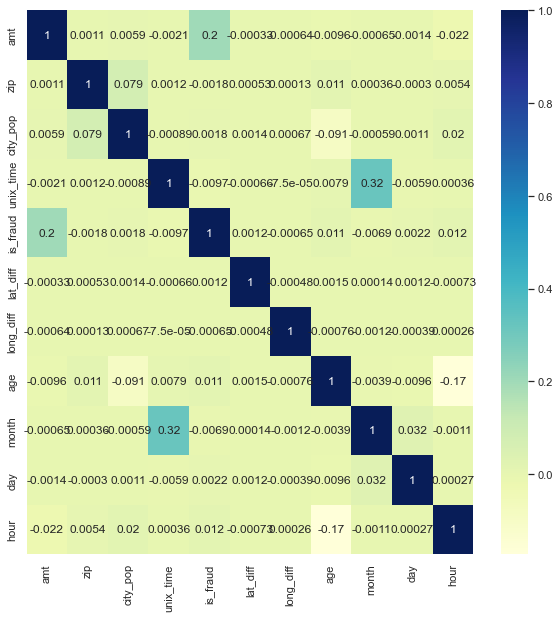

In [24]:
# Create a seaborn heatmap to view the correlation

plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

From the correlation analysis, there's very little correlation between the attributes and the target attribute ('is_fraud'). The attribute that has a little bit of correlation compared to the rest of the attributes is the 'amt' attribute. We'll proceed to see whether the outliers affect this correlation analysis. 

## **Checking the effect of outliers**

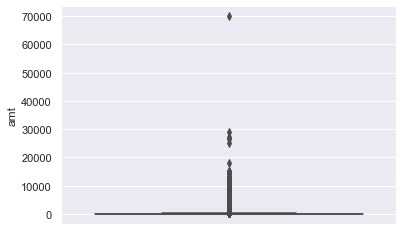

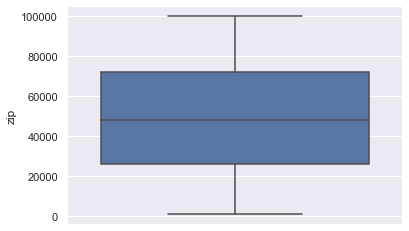

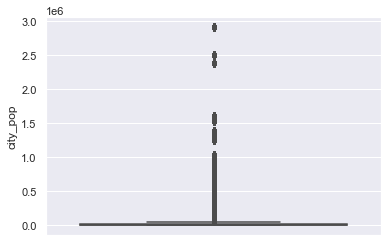

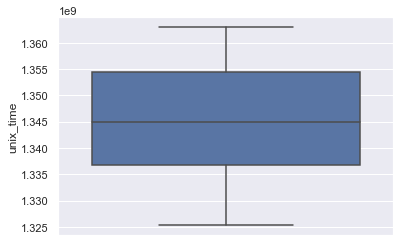

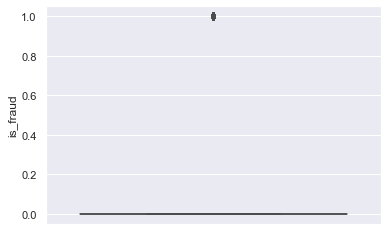

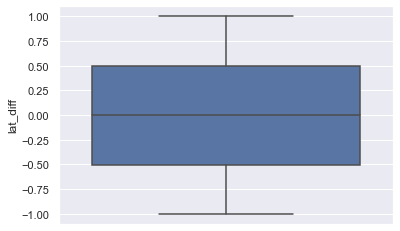

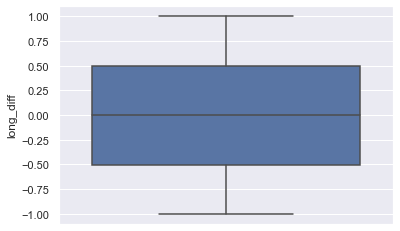

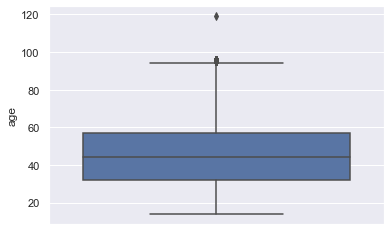

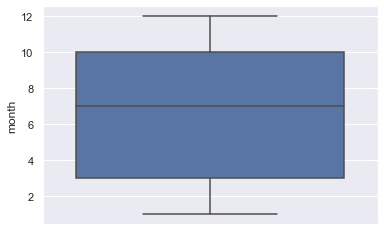

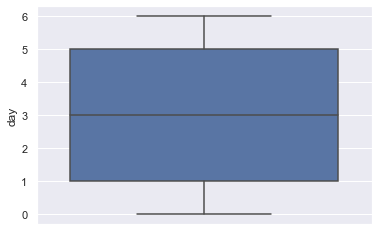

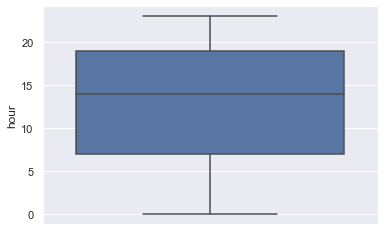

In [25]:
#Select data with numerical columns only to create a boxplot
select_data = df.select_dtypes(exclude=['object', 'datetime64[ns]'])

#Loop through the data to create the boxplots
for column in select_data:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=select_data, y=column)

Following the boxplot visualisation of the numerical attributes, the attributes with outliers are 'amt', 'age', 'city-pop' and 'is_fraud. Further analysis will be done to see how to handle these outliers.

In [26]:
# Check for the number of outliers in the amount column and categorize it whether it's fraud or not.

#Copy the dataframe
df1 = df.copy()

#Calculate the quartiles
q1 = df1['amt'].quantile(0.25)
q3 = df1['amt'].quantile(0.75)

df1['Outlier'] = ~df1['amt'].between(q1, q3)
df1.groupby('is_fraud')['Outlier'].sum()

is_fraud
0    518989
1      5042
Name: Outlier, dtype: int64

In [27]:
#Check the number of fraudulent and non-fraudulent transactions in the dataset

pd.value_counts(df.is_fraud)

0    1042562
1       6006
Name: is_fraud, dtype: int64

The outliers present in the 'amt' attribute mostly fall in the non-fraudulent transactions which is unexpected. The number of outliers in 49% of the non fraudulent transactions and 83% of the fraudulent transactions from the dataset. 

In [28]:
#Remove the outliers from the 'amt' attribute

#Create a copy of the dataset
df2 = df.copy()

print("Shape of dataset with outliers:", df2.shape)

# Calculate quantiles and IQR
Q1 = df2['amt'].quantile(0.25) 
Q3 = df2['amt'].quantile(0.75)

IQR = Q3 - Q1

# Return a boolean array of the rows with (any) non-outlier column values
condition = ~((df2['amt'] < (Q1 - 1.5 * IQR)) | (df2['amt'] > (Q3 + 1.5 * IQR)))

# Filter our dataframe based on condition
filtered_df = df2[condition]

print("Shape of dataset without outliers:", filtered_df.shape)

Shape of dataset with outliers: (1048568, 24)
Shape of dataset without outliers: (994026, 24)


In [29]:
#Statistical analysis on the filtered data

filtered_df.describe()

,amt,zip,city_pop,unix_time,is_fraud,lat_diff,long_diff,age,month,day,hour
count,994026.000000,994026.000000,994026.000000,994026.000000,994026.000000,994026.000000,994026.000000,994026.000000,994026.000000,994026.000000,994026.000000
mean,50.382950,48744.149474,86966.371789,1344907396.679767,0.001463,-0.000069,0.000127,46.010361,6.528789,3.068131,12.824906
std,43.742339,26885.086194,297561.437426,10191681.949173,0.038218,0.577454,0.577699,17.429737,3.580949,2.115299,6.795561
min,0.000000,1257.000000,23.000000,1325376018.000000,0.000000,-0.999998,-0.999997,14.000000,1.000000,0.000000,0.000000
25%,9.140000,26237.000000,737.000000,1336691176.750000,0.000000,-0.500337,-0.500514,32.000000,3.000000,1.000000,7.000000
50%,43.760000,48174.000000,2376.000000,1344900676.000000,0.000000,-0.000660,0.000901,44.000000,7.000000,3.000000,14.000000
75%,76.450000,72011.000000,19408.000000,1354365263.750000,0.000000,0.500478,0.499713,57.000000,10.000000,5.000000,19.000000
max,193.160000,99783.000000,2906700.000000,1362931730.000000,1.000000,0.999999,0.999997,119.000000,12.000000,6.000000,23.000000


In [30]:
#Correlation analysis on the filtered data
corr_filtered = filtered_df.corr()
corr_filtered

,amt,zip,city_pop,unix_time,is_fraud,lat_diff,long_diff,age,month,day,hour
amt,1.000000,0.000647,-0.014603,-0.000749,-0.022134,-0.001094,-0.000494,-0.007052,-0.001416,-0.001703,-0.162371
zip,0.000647,1.000000,0.078326,0.000992,0.000039,0.000449,0.000345,0.012892,0.000487,0.000648,0.007943
city_pop,-0.014603,0.078326,1.000000,-0.000585,-0.000772,0.001420,0.000637,-0.091970,-0.000152,0.000843,0.025252
unix_time,-0.000749,0.000992,-0.000585,1.000000,-0.008070,-0.000569,-0.000169,0.008093,0.321664,-0.006393,0.000474
is_fraud,-0.022134,0.000039,-0.000772,-0.008070,1.000000,0.001361,-0.000838,0.000805,-0.006034,-0.000175,-0.002481
lat_diff,-0.001094,0.000449,0.001420,-0.000569,0.001361,1.000000,-0.000557,0.001485,0.000271,0.001123,-0.000645
long_diff,-0.000494,0.000345,0.000637,-0.000169,-0.000838,-0.000557,1.000000,-0.000867,-0.001240,-0.000168,-0.000045
age,-0.007052,0.012892,-0.091970,0.008093,0.000805,0.001485,-0.000867,1.000000,-0.003740,-0.009951,-0.173320
month,-0.001416,0.000487,-0.000152,0.321664,-0.006034,0.000271,-0.001240,-0.003740,1.000000,0.032125,-0.001274
day,-0.001703,0.000648,0.000843,-0.006393,-0.000175,0.001123,-0.000168,-0.009951,0.032125,1.000000,0.000461


<AxesSubplot:>

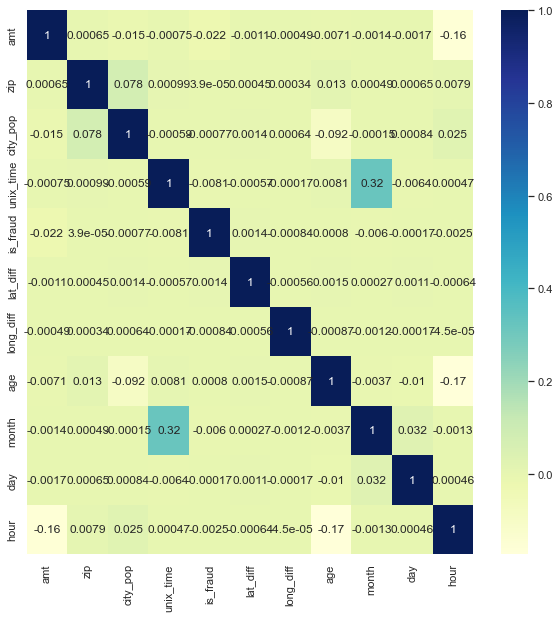

In [31]:
#Plot a heatmap correlation matrix to see the correlation with the target attribute

plt.figure(figsize=(10,10))
sns.heatmap(corr_filtered, annot=True, cmap="YlGnBu")

<Figure size 720x720 with 0 Axes>

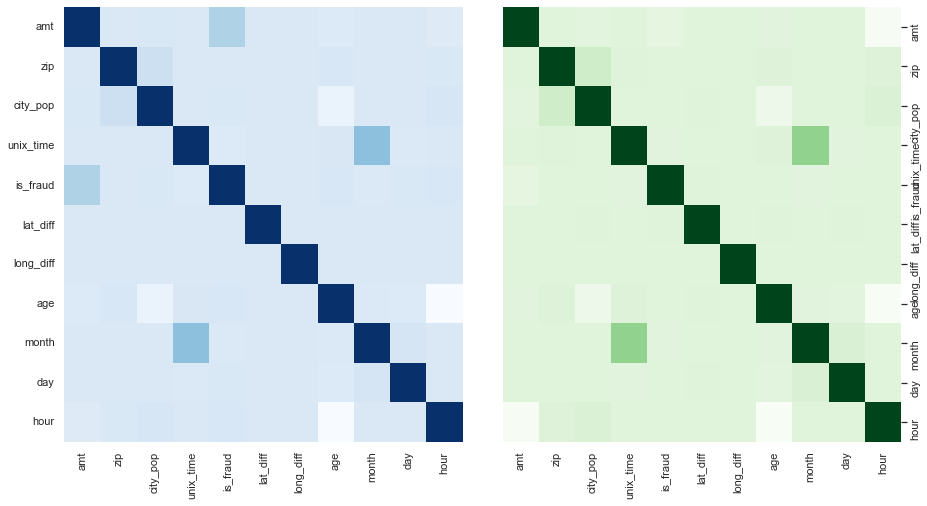

In [32]:
# Plot side by side heatmaps

plt.figure(figsize=(10,10))

fig, (ax1, ax2) = plt.subplots(ncols=2)
fig.subplots_adjust(wspace=0.1)

sns.heatmap(corr, cmap = "Blues", ax=ax1, cbar=False)
sns.heatmap(corr_filtered, cmap = "Greens", ax=ax2, cbar=False)

ax2.yaxis.tick_right()

fig.subplots_adjust(wspace=0.1)
plt.show()

Deleting the outliers isn't the best approach as it weakens the correlation analysis of the attributes. This could mean that these values are probably not outliers and could be useful in analysis of the data. Considering that the amounts are quite diverse, mean imputation would affect the quality of the data. It's thus advisable to analyze the data with the records given.

In [33]:
# get the 20 highest values from the 'amt' attribute

df.nlargest(n=20, columns=['amt'])

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,is_fraud,lat_diff,long_diff,age,month,day,hour
206,2019-01-01 02:34:00,375534000000000.0,fraud_Padberg-Welch,grocery_pos,70000.000000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1986-03-28,868404210f9f96063a4cb46e6cf1494d,1325385272,0,0.377834,-0.813338,33,1,1,2
787549,2019-01-12 16:19:00,4979420000000000.0,fraud_Satterfield-Lowe,travel,28948.900000,Kelly,Zimmerman,F,1893 Katie Tunnel,Westerville,...,1935-10-02,309c4bf7fc47b1ddee5ad883bcf634b6,1354378763,0,-0.898013,-0.244902,84,1,5,16
793677,2019-02-12 15:53:00,675910000000.0,"fraud_Monahan, Hermann and Johns",travel,27390.120000,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,...,1964-03-16,2ca9bd5df126cc35e541a4f2c2551197,1354463626,0,-0.529873,0.962115,55,2,1,15
606211,2019-09-14 22:19:00,30408300000000.0,fraud_Boyer-Haley,travel,26544.120000,Brandon,Pittman,M,2881 Frey Village,Cross,...,1973-09-10,dda9d800d37a9fc2c086a836d66b0588,1347661141,0,0.316144,-0.060293,46,9,5,22
352894,2019-06-14 20:15:00,5540640000000000.0,fraud_Hackett Group,travel,25086.940000,Kenneth,Foster,M,329 Michael Extension,Lawrence,...,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,0,0.293926,0.313663,34,6,4,20
187885,2019-07-04 15:32:00,6538440000000000.0,fraud_Tillman LLC,travel,17897.240000,Gina,Grimes,F,444 Robert Mews,Clarks Mills,...,1997-09-22,1c9f2b574fb9bf860c76ea200252fe05,1333812743,0,0.024058,-0.509428,22,7,3,15
752016,2019-11-17 20:00:00,2264940000000000.0,fraud_Goyette-Herzog,travel,15047.030000,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,1995-10-17,969e374d8c4e1a628b60150391a70742,1353182417,0,-0.485313,-0.268379,24,11,6,20
150564,2019-03-22 13:17:00,4450830000000000.0,"fraud_Larson, Quitzon and Spencer",travel,15034.180000,Donna,Davis,F,6760 Donovan Lakes,Clayton,...,1972-01-20,938cfcbde2c3a64c38b7855eb8288de0,1332422254,0,-0.675888,-0.346494,47,3,4,13
164881,2019-03-28 16:53:00,630452000000.0,fraud_Ankunding-Carroll,travel,14630.680000,Rachel,Daniels,F,561 Little Plain Apt. 738,Wetmore,...,1972-12-06,c3fd5aeb603b150ce5c05c7ee38ada97,1332953627,0,-0.590952,-0.887804,47,3,3,16
474610,2019-07-27 23:29:00,3585050000000000.0,"fraud_Kunze, Larkin and Mayert",travel,14467.640000,Jeffery,Brown,M,296 Maria Street,West Eaton,...,1963-12-28,529cdd779b6da5a8cdbaa1be199de35c,1343431790,0,-0.451240,0.620797,56,7,5,23


In [34]:
# Get the 20 least values from the 'amt' attribute
df.nsmallest(n=20, columns=['amt'])

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,is_fraud,lat_diff,long_diff,age,month,day,hour
12,2019-01-01 00:06:00,180043000000000.0,fraud_Lockman Ltd,grocery_pos,0.000000,Charles,Robles,M,3337 Lisa Divide,Saint Petersburg,...,1989-02-28,c1d9a7ddb1e34639fe82758de97f4abf,1325376416,0,0.159207,-0.415409,30,1,1,0
45,2019-01-01 00:32:00,213127000000000.0,fraud_Doyle Ltd,grocery_pos,0.000000,Christopher,Luna,M,242 Brian Mountain,Laredo,...,1971-01-28,685bcca9eb5ce554134d7242d564ecc9,1325377967,0,-0.073453,0.318311,48,1,1,0
21768,2019-01-14 00:57:00,3552580000000000.0,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,1.000000,Jonathan,Castro,M,200 Christie Mills Apt. 307,Andrews,...,1965-04-13,197ae55bfdf14775bb51bc0e9e70eeeb,1326502650,0,-0.404591,0.501642,54,1,0,0
22762,2019-01-14 13:05:00,4561370000000000.0,fraud_Turner and Sons,shopping_pos,1.000000,Pamela,Lewis,F,653 Jessica Extension Apt. 668,Clifton,...,1988-01-11,9f54e7b342064745407f9a3012e814d6,1326546313,0,-0.143581,0.971972,31,1,0,13
23685,2019-01-14 20:23:00,2712210000000000.0,"fraud_McLaughlin, Armstrong and Koepp",travel,1.000000,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,1977-02-22,cb8bf5e2473d7fcb0c457f9bba6a4bfc,1326572629,0,0.399158,-0.066524,42,1,0,20
25146,2019-01-15 13:05:00,4.04504e+18,fraud_Dare-Gibson,health_fitness,1.000000,Bianca,Scott,F,9588 Cox Rapid Apt. 257,Atglen,...,1928-07-15,3d7f67a607ea5d48511941f41025190d,1326632716,0,0.843543,0.987704,91,1,1,13
34740,2019-01-21 13:23:00,340951000000000.0,fraud_Dooley Inc,shopping_pos,1.000000,Maria,Garcia,F,865 Thomas Village,Orangeburg,...,1971-02-07,c67f870d1ae29b034b7731d191bb9a89,1327152239,0,-0.685284,0.943169,48,1,0,13
41725,2019-01-25 19:18:00,377655000000000.0,fraud_Fadel-Hilpert,health_fitness,1.000000,Lawrence,Davis,M,7421 Serrano Lane Apt. 580,Powell,...,1969-02-22,3bb52a981528d4817ebe7088a211b63f,1327519083,0,-0.938275,-0.071553,50,1,4,19
49569,2019-01-29 19:15:00,2283740000000000.0,"fraud_Hartmann, Rowe and Hermann",travel,1.000000,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,1997-12-27,f88cf3c04aab3295bba01c16db413bc3,1327864541,0,0.410779,0.040886,22,1,1,19
52655,2019-01-02 02:35:00,4623560000000.0,fraud_Morissette PLC,shopping_pos,1.000000,Vincent,Waller,M,9379 Vanessa Run Apt. 400,Lohrville,...,1954-07-15,6f40a008d66c954bcbe894978487defa,1328063732,0,-0.514889,-0.136861,65,1,2,2


In [35]:
#Check the 99th percentile of the data

np.percentile(df['amt'],99)

544.9032999999996

- There are two records in the dataset that have a zero amount, this many not be useful in the dataset and will be deleted from the dataset. 

- There's one amount in the dataset with a value of 70,000 dollars that's highly suspicious as it's categorized in the grocery shopping and it's a non-fraudulent transaction and it was transacted at 2am. 

- 99% of the data lies below 544.90 dollars. 

## **Attribute Analysis**

Plot graphical representation of the attributes to better see the correlation between the fradulent transactions & the other attributes

In [36]:
#Remove the records with 0 amount in shillings
df = df.drop(df.index[df['amt'] == 0])

#confirm the change
df.nsmallest(n=20, columns=['amt'])
 

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,is_fraud,lat_diff,long_diff,age,month,day,hour
21768,2019-01-14 00:57:00,3552580000000000.0,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,1.000000,Jonathan,Castro,M,200 Christie Mills Apt. 307,Andrews,...,1965-04-13,197ae55bfdf14775bb51bc0e9e70eeeb,1326502650,0,-0.404591,0.501642,54,1,0,0
22762,2019-01-14 13:05:00,4561370000000000.0,fraud_Turner and Sons,shopping_pos,1.000000,Pamela,Lewis,F,653 Jessica Extension Apt. 668,Clifton,...,1988-01-11,9f54e7b342064745407f9a3012e814d6,1326546313,0,-0.143581,0.971972,31,1,0,13
23685,2019-01-14 20:23:00,2712210000000000.0,"fraud_McLaughlin, Armstrong and Koepp",travel,1.000000,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,...,1977-02-22,cb8bf5e2473d7fcb0c457f9bba6a4bfc,1326572629,0,0.399158,-0.066524,42,1,0,20
25146,2019-01-15 13:05:00,4.04504e+18,fraud_Dare-Gibson,health_fitness,1.000000,Bianca,Scott,F,9588 Cox Rapid Apt. 257,Atglen,...,1928-07-15,3d7f67a607ea5d48511941f41025190d,1326632716,0,0.843543,0.987704,91,1,1,13
34740,2019-01-21 13:23:00,340951000000000.0,fraud_Dooley Inc,shopping_pos,1.000000,Maria,Garcia,F,865 Thomas Village,Orangeburg,...,1971-02-07,c67f870d1ae29b034b7731d191bb9a89,1327152239,0,-0.685284,0.943169,48,1,0,13
41725,2019-01-25 19:18:00,377655000000000.0,fraud_Fadel-Hilpert,health_fitness,1.000000,Lawrence,Davis,M,7421 Serrano Lane Apt. 580,Powell,...,1969-02-22,3bb52a981528d4817ebe7088a211b63f,1327519083,0,-0.938275,-0.071553,50,1,4,19
49569,2019-01-29 19:15:00,2283740000000000.0,"fraud_Hartmann, Rowe and Hermann",travel,1.000000,Shannon,Williams,F,9345 Spencer Junctions Suite 183,Alpharetta,...,1997-12-27,f88cf3c04aab3295bba01c16db413bc3,1327864541,0,0.410779,0.040886,22,1,1,19
52655,2019-01-02 02:35:00,4623560000000.0,fraud_Morissette PLC,shopping_pos,1.000000,Vincent,Waller,M,9379 Vanessa Run Apt. 400,Lohrville,...,1954-07-15,6f40a008d66c954bcbe894978487defa,1328063732,0,-0.514889,-0.136861,65,1,2,2
53832,2019-01-02 21:44:00,4364010000000000.0,"fraud_Quitzon, Green and Bashirian",shopping_pos,1.000000,Gary,Martinez,M,03512 Jackson Ports,Reno,...,1997-12-03,9b1adc1990ea1701b155da4996a4d975,1328132687,0,0.724600,-0.754417,22,1,2,21
54942,2019-02-02 17:10:00,3575540000000000.0,fraud_Erdman-Ebert,personal_care,1.000000,Rachel,Villarreal,F,250 Carrie Throughway,University,...,2001-06-22,6fb133dc5b448c4b5f9aed2603f5a97e,1328202647,0,-0.133015,0.087565,18,2,5,17


Fraudulent Cases: 6006
Valid Transactions: 1042560
Proportion of Fraudulent Cases: 0.005727822569108669


<AxesSubplot:>

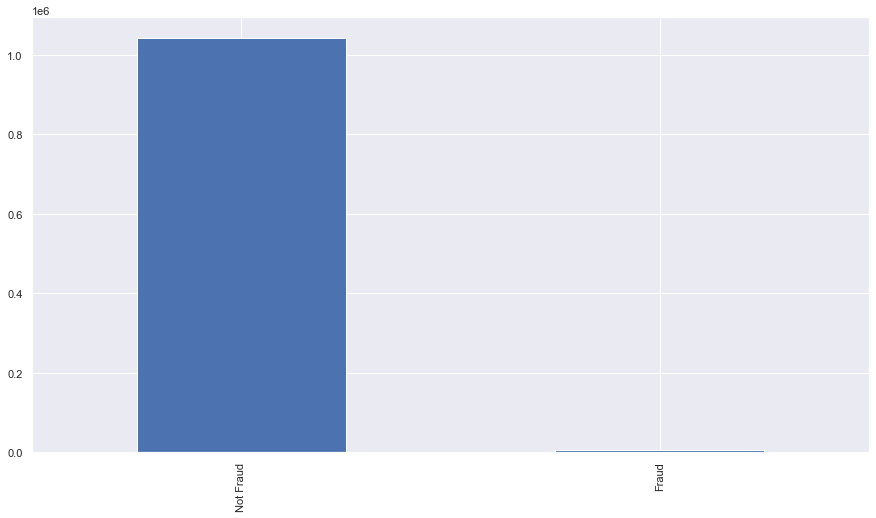

In [37]:
#Check for the relative proportion of the fraudulent transactions versus the non fraudulent transactions

print("Fraudulent Cases: " + str(len(df[df["is_fraud"] == 1])))
print("Valid Transactions: " + str(len(df[df["is_fraud"] == 0])))
print("Proportion of Fraudulent Cases: " + str(len(df[df["is_fraud"] == 1])/ df.shape[0]))

# See the proportion of the Fraudulent transactions
data_p = df.copy()
data_p[" "] = np.where(data_p["is_fraud"] == 1 ,  "Fraud", "Not Fraud")

# Plot a bar graph to visualize the fraud vs non fraudulent transactions
data_p[" "].value_counts().plot(kind="bar")

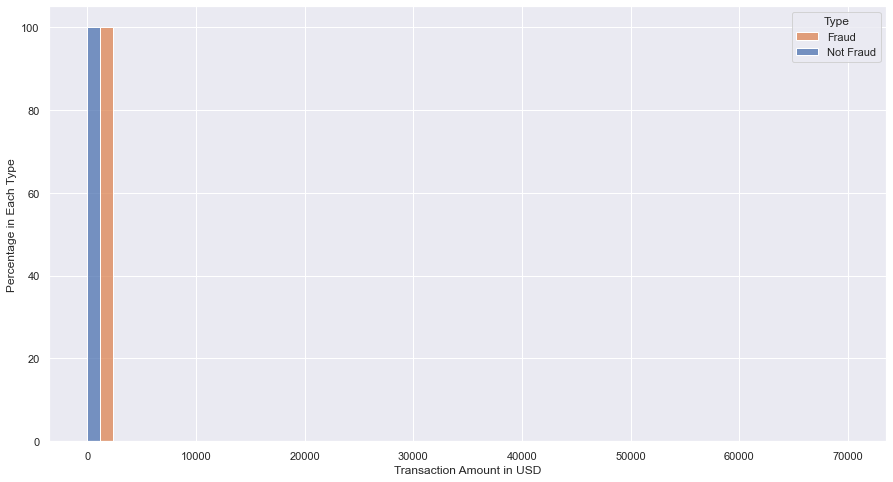

In [38]:
#Transaction amount vs Fraud

ax=sns.histplot(x='amt',data = df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=30)

ax.set_ylabel('Percentage in Each Type')

ax.set_xlabel('Transaction Amount in USD')

plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])



The above graph doesn't give a clear analysis. We'll thus filter the data to amounts lower than 1,000 dollars to have a more clearer analysis on the spread of fraudulent and non fraudulent transactions

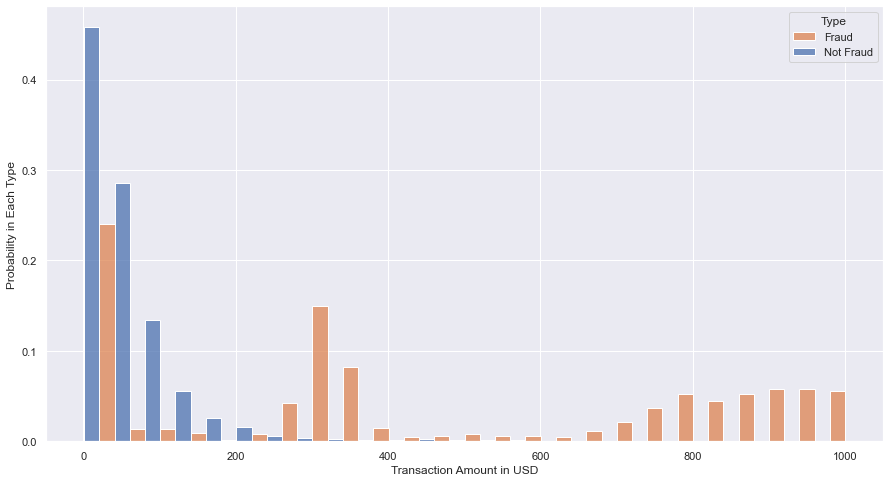

In [39]:
#Transaction amount of values less than 1000 dollars vs Fraud

ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='probability',multiple='dodge',common_norm=False,bins=25)

ax.set_ylabel('Probability in Each Type')

ax.set_xlabel('Transaction Amount in USD')

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

A large number of the fraudulent transactions are below 100 dollars and a big proportion of the fradulent transactions are over 300 dollars.

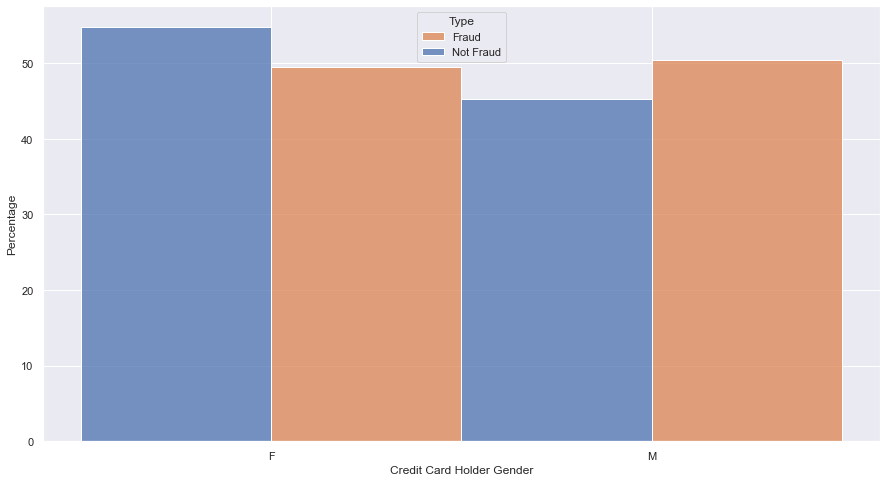

In [40]:
#Gender vs Fraud

ax = sns.histplot(x='gender',data = df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)

ax.set_ylabel('Percentage')

ax.set_xlabel('Credit Card Holder Gender')

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Gender is not a factor in determining whether a transaction is fradulent or not.


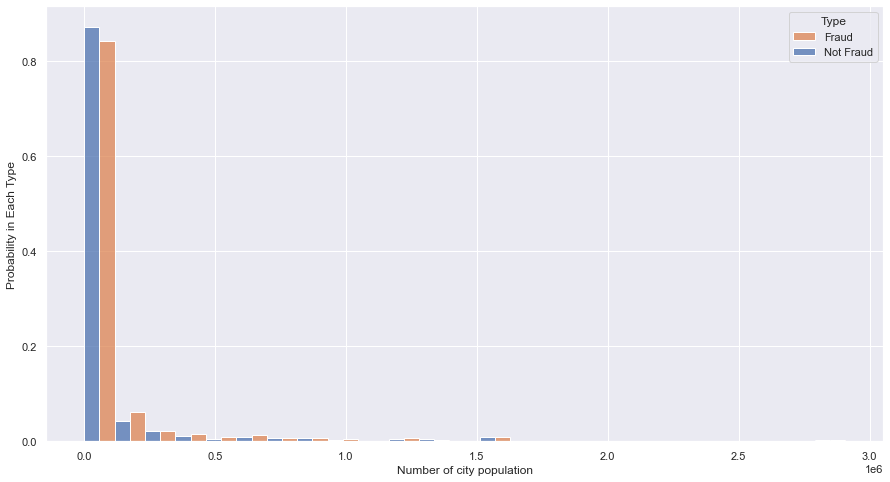

In [41]:
#City population vs Fraud

ax=sns.histplot(x='city_pop',data=df,hue='is_fraud',stat='probability',multiple='dodge',common_norm=False,bins=25)

ax.set_ylabel('Probability in Each Type')

ax.set_xlabel('Number of city population')

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The city population is not a determining factor in classifying fraudulent and non-fraudulent transactions

Text(0.5, 1.0, 'The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

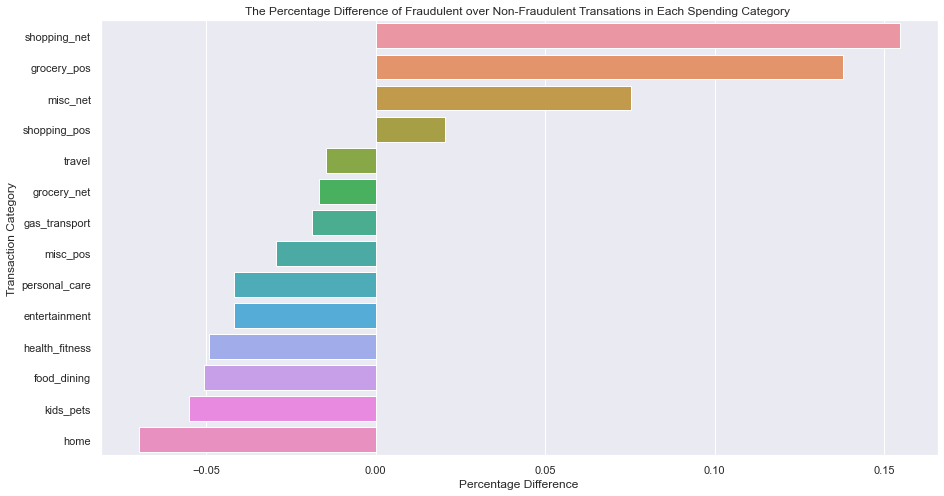

In [42]:
#Spending category vs Fraud

a = df[df['is_fraud']==0]['category'].value_counts(normalize=True).to_frame().reset_index()
a.columns = ['category','not fraud percentage']

b = df[df['is_fraud']==1]['category'].value_counts(normalize=True).to_frame().reset_index()
b.columns = ['category','fraud percentage']

ab = a.merge(b,on='category')
ab['diff'] = ab['fraud percentage'] - ab['not fraud percentage']

ax = sns.barplot(y='category',x='diff',data=ab.sort_values('diff',ascending=False))
ax.set_xlabel('Percentage Difference')
ax.set_ylabel('Transaction Category')
plt.title('The Percentage Difference of Fraudulent over Non-Fraudulent Transations in Each Spending Category ')

Shopping and grocery have the highest difference in percentage between the fraudulent and non fraudulent transactions. The amount of 70,000 dollars seems to cause the difference in the grocery category.

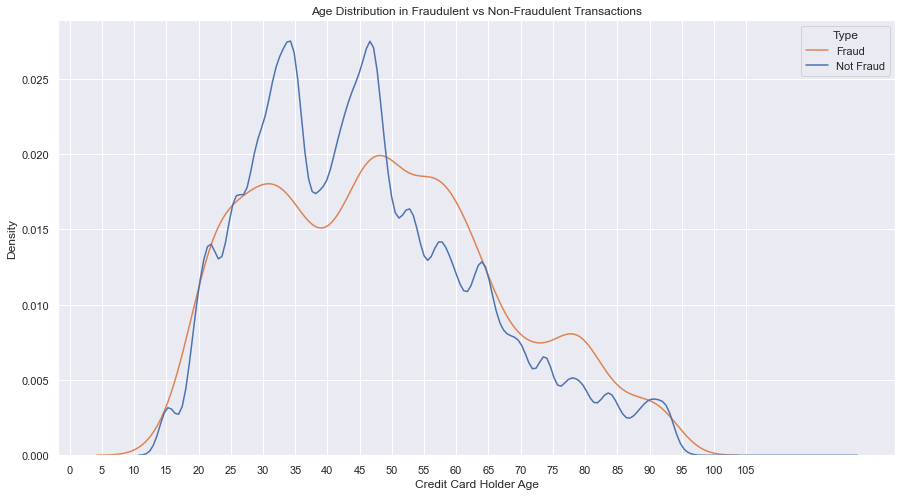

In [43]:
#age vs fraud

ax = sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)

ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')

plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

- Fraudulent transactions is highest in users between the ages of 45 and 50 years of age and 25 and 30 years of age. This is aligned also to the number of users with non fraudulent transactions which could probably mean the more one spends, the more they are susceptible to fraud.

- Those between 50 and 90 years of age have higher fraudulent transactions than those with non-fraudulent transactions. This age is probably affected more as they many not be keen in taking note of available security features they have. 

- There are credit card transactions for users below 18 years; this could be credit cards that are linked to their parents and/or guardians.

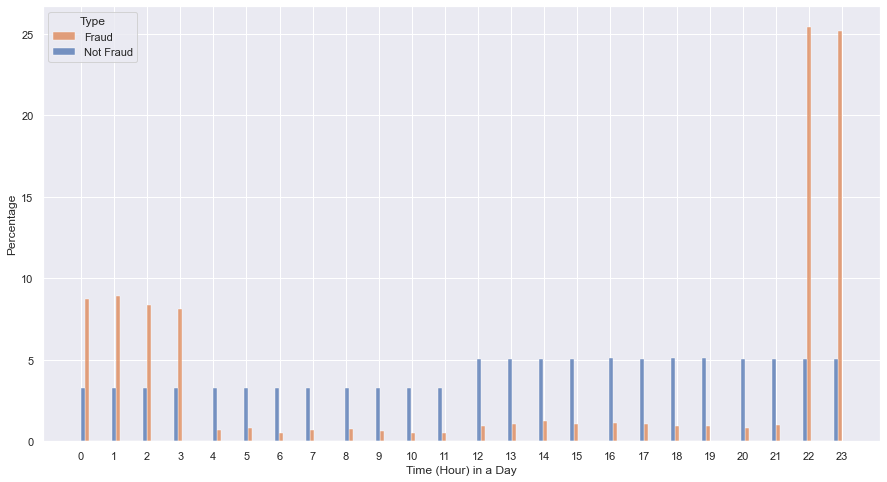

In [44]:
#Hourly Trend

ax = sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')

ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')

plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The peak time for fraudulent transactions is between 10:00PM and 3:00AM

/var/folders/bn/fl691_z53kxcll6lg4rfy3k40000gn/T/ipykernel_8745/2826695582.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



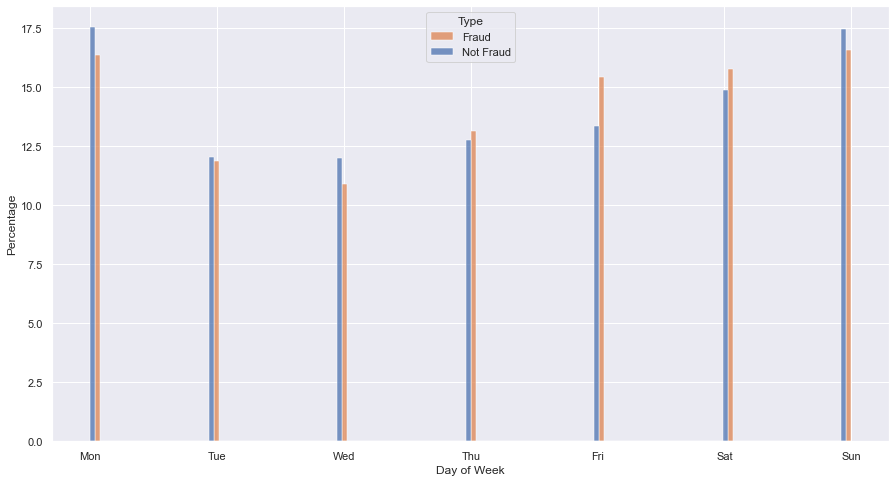

In [45]:
#Weekly Trend

ax = sns.histplot(df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')

ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Most of the fraudulent transactions happen on Sundays and Mondays

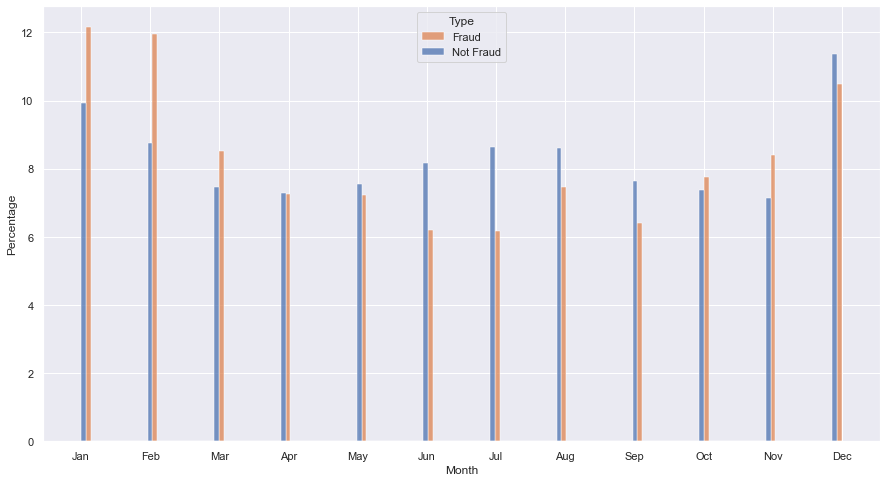

In [46]:
#Monthly Trend

ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')

ax.set_ylabel('Percentage')
ax.set_xlabel('Month')

plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The peak months for fraudulent transactions are Jan, Feb, Mar, Nov and Dec. These are the months that financial insistutions should be most aware. 

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

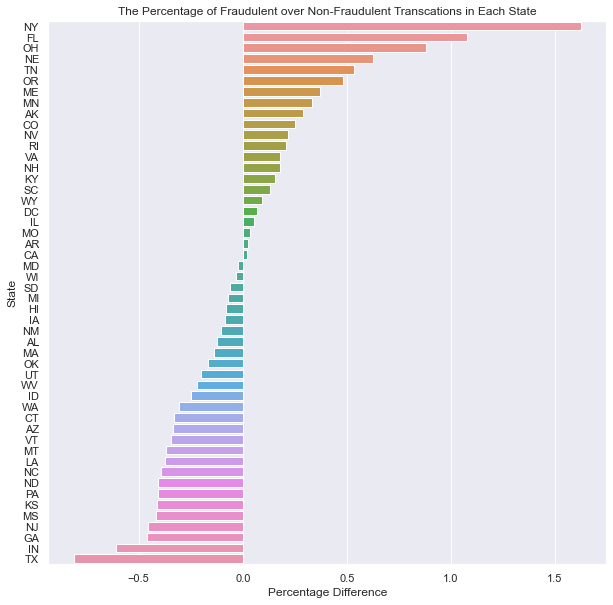

In [47]:
#State Vs Fraud

plt.figure(figsize=(10,10))

a = df['state'][df.is_fraud==0].value_counts(normalize=True)
a = a.to_frame()
a = a.reset_index()
a.columns = ['State', 'Per']

b = df['state'][df.is_fraud==1].value_counts(normalize=True)
b = b.to_frame()
b = b.reset_index()
b.columns = ['State', 'Per']

merged = a.merge(b,on='State')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1 = sns.barplot(data = merged, x='diff',y='State')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('State')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each State')

New York is definitely the city to watch out for as it has the highest percentage difference between the fraudulent and non fraudulent transactions


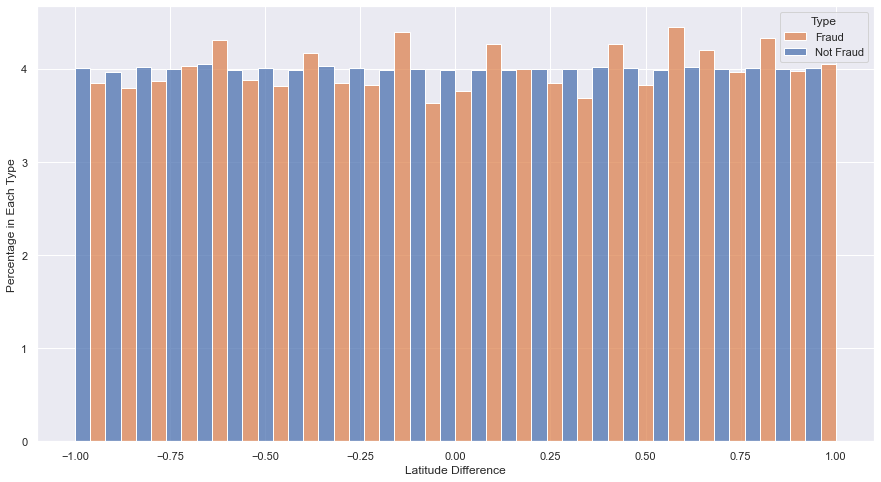

In [48]:
#Latt_diff vs Fraud

ax=sns.histplot(x='lat_diff',data = df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)

ax.set_ylabel('Percentage in Each Type')

ax.set_xlabel('Latitude Difference')

plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])

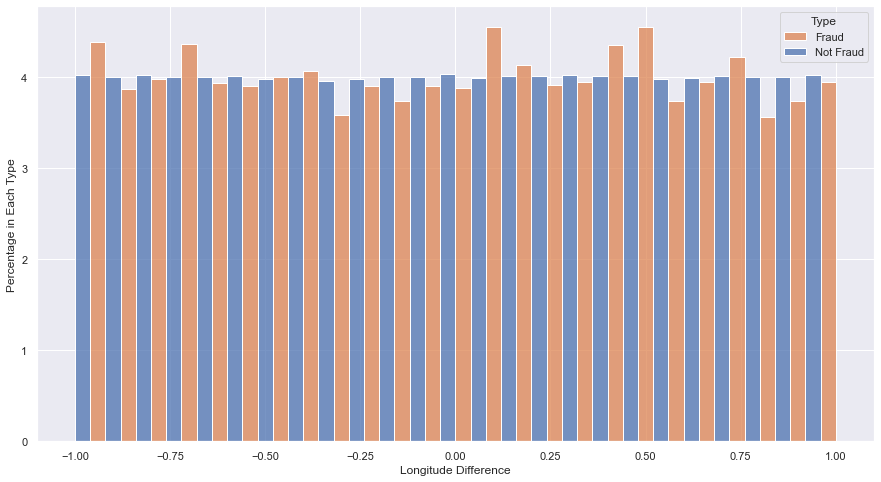

In [49]:
#Long_diff vs Fraud

ax=sns.histplot(x='long_diff',data = df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)

ax.set_ylabel('Percentage in Each Type')

ax.set_xlabel('Longitude Difference')

plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])

The Longitude and Latitude Differences don't show any significant difference between the fraudulent and non fraudulent transactions.

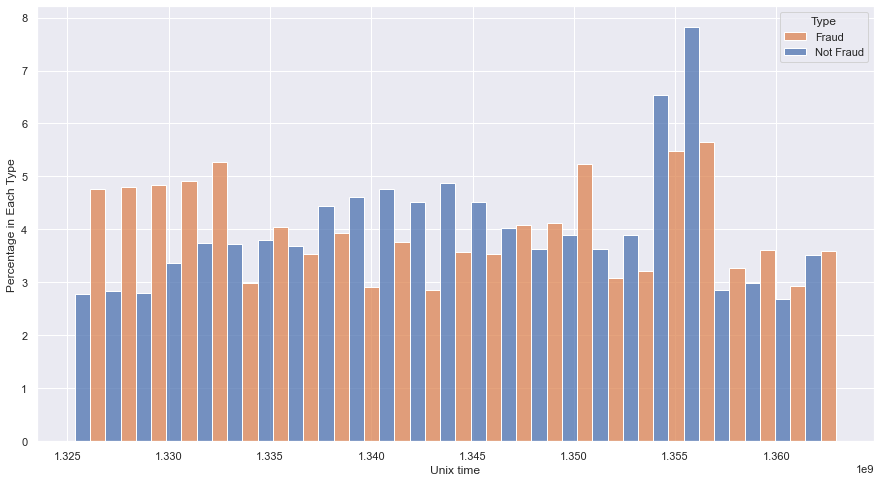

In [50]:
#Unixtime vs Fraud

ax=sns.histplot(x='unix_time',data = df,hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)

ax.set_ylabel('Percentage in Each Type')

ax.set_xlabel('Unix time')

plt.legend(title = 'Type', labels = ['Fraud', 'Not Fraud'])

The unix_time is the amount of time it takes to complete a transaction. For the transactions that take the shortest time, the fraudulent transactions are more and also the trend repeats itself to those transactions that take the longest time to complete.

### **Summary of attribute analysis**

- The city population, gender of a card user, latitude and longitude differences are not a determining factors in classifying fraudulent and a non fraudulent transactions.
- Fraudulent transactions take the shortest and also the longest time to complete.
- The peak months for fraudulent transactions are Jan, Feb, Mar, Nov and Dec. 
- Most of the fraudulent transactions happen on Sundays and Mondays.
- The peak time for fraudulent transactions is between 10:00PM and 3:00AM.
- Fraudulent transactions is highest in users between the ages of 45 and 50 years of age and 25 and 30 years of age.
- Those between 50 and 90 years of age have higher fraudulent transactions than those with non-fraudulent transactions.

## **Feature Selection and Model Training**


Check the unique values of each column and select columns with low cardinality for the modeling. 

In [51]:
#Check the unique values
df.nunique()

trans_date_trans_time     476593
cc_num                       943
merchant                     693
category                      14
amt                        48602
first                        348
last                         479
gender                         2
street                       965
city                         879
state                         51
zip                          952
city_pop                     865
job                          493
dob                          951
trans_num                1048566
unix_time                1030642
is_fraud                       2
lat_diff                  899703
long_diff                 885400
age                           84
month                         12
day                            7
hour                          24
dtype: int64

### **Next actions**

- One hot encoding will be done to the 'category' atrribute to create numerical values that will be useful for feature selection and modeling.

- The below attributes will be removed based on the attribute analysis done above on the attributes that will not be useful for the modeling: city population, gender, lat_diff and long_diff. 

- The non numerical attributes will be removed from the dataset except the category attribute which has a low cardinality.


In [52]:
#Drop columns not needed for the model data

model_data = df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'first', 'last', 'gender', 
                      'street', 'city', 'state', 'city_pop', 'job', 'dob', 'trans_num', 'lat_diff', 
                     'long_diff'], axis=1)
model_data

,category,amt,zip,unix_time,is_fraud,age,month,day,hour
0,misc_net,4.970000,28654,1325376018,0,31,1,1,0
1,grocery_pos,107.230000,99160,1325376044,0,41,1,1,0
2,entertainment,220.110000,83252,1325376051,0,57,1,1,0
3,gas_transport,45.000000,59632,1325376076,0,52,1,1,0
4,misc_pos,41.960000,24433,1325376186,0,33,1,1,0
...,...,...,...,...,...,...,...,...,...
1048570,health_fitness,77.000000,21405,1362931649,0,77,10,5,16
1048571,misc_pos,116.940000,52563,1362931670,0,21,10,5,16
1048572,home,21.270000,40202,1362931711,0,68,10,5,16
1048573,health_fitness,9.520000,11796,1362931718,0,30,10,5,16


In [53]:
# Apply one-hot encoder to the column with categorical data: 'category'

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_data = pd.DataFrame(OH_encoder.fit_transform(model_data[['category']]))


OH_cols_data.index = model_data.index
num_X_train = model_data.drop(['category'], axis=1)

OH_X_data = pd.concat([num_X_train, OH_cols_data], axis=1)
OH_X_data.head()

,amt,zip,unix_time,is_fraud,age,month,day,hour,0,1,...,4,5,6,7,8,9,10,11,12,13
0,4.970000,28654,1325376018,0,31,1,1,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,107.230000,99160,1325376044,0,41,1,1,0,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,220.110000,83252,1325376051,0,57,1,1,0,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,45.000000,59632,1325376076,0,52,1,1,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,41.960000,24433,1325376186,0,33,1,1,0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
#Display all the columns in the dataset

with pd.option_context("display.max_columns", None):
    display(OH_X_data)


,amt,zip,unix_time,is_fraud,age,month,day,hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,4.970000,28654,1325376018,0,31,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,107.230000,99160,1325376044,0,41,1,1,0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,220.110000,83252,1325376051,0,57,1,1,0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,45.000000,59632,1325376076,0,52,1,1,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,41.960000,24433,1325376186,0,33,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,77.000000,21405,1362931649,0,77,10,5,16,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1048571,116.940000,52563,1362931670,0,21,10,5,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
1048572,21.270000,40202,1362931711,0,68,10,5,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1048573,9.520000,11796,1362931718,0,30,10,5,16,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### Embedded FS method (Lasso regularization) to select features based on importance

In [55]:
# Choose the target variable and feature matrix
X = OH_X_data.drop(['is_fraud'], axis=1)
y = OH_X_data['is_fraud']


In [56]:
#Lasso regularization
reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))

coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) +
      " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
#coef
reg.coef_

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Best alpha using built-in LassoCV: 7470.548427


/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Best score using built-in LassoCV: 0.000000
Lasso picked 1 variables and eliminated the other 20 variables


array([ 0.00000000e+00, -0.00000000e+00, -1.31207597e-25,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00])

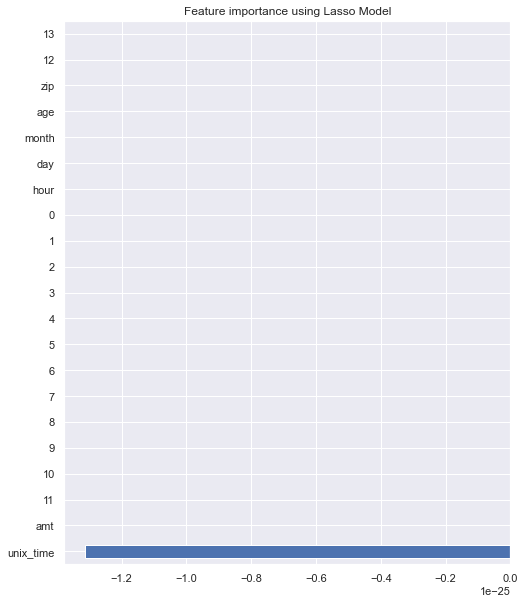

In [57]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

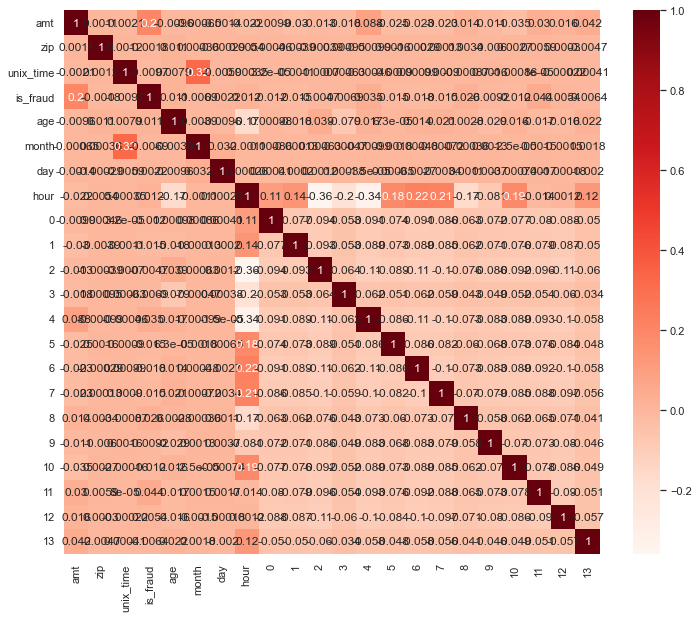

In [58]:
# Using Pearson Correlation of all features (including target)
plt.figure(figsize=(12,10))                      


corr_X = OH_X_data.corr()
sns.heatmap(corr_X, annot=True, cmap=plt.cm.Reds)  
plt.show()   

In [59]:
#Correlation with output variable
corr_target = abs(corr_X["is_fraud"])


#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.5]
relevant_features

is_fraud   1.000000
Name: is_fraud, dtype: float64

There is low correlation between the features with the clustering Embedded FS method (Lasso regularization) to select features based on importance being the only viable option picking three features.

### **Option 2: Using the dummies method**

In [60]:
model_data_dummy = pd.get_dummies(model_data, drop_first=True)
model_data_dummy

,amt,zip,unix_time,is_fraud,age,month,day,hour,category_food_dining,category_gas_transport,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.970000,28654,1325376018,0,31,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,107.230000,99160,1325376044,0,41,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,220.110000,83252,1325376051,0,57,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.000000,59632,1325376076,0,52,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,41.960000,24433,1325376186,0,33,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,77.000000,21405,1362931649,0,77,10,5,16,0,0,...,0,1,0,0,0,0,0,0,0,0
1048571,116.940000,52563,1362931670,0,21,10,5,16,0,0,...,0,0,0,0,0,1,0,0,0,0
1048572,21.270000,40202,1362931711,0,68,10,5,16,0,0,...,0,0,1,0,0,0,0,0,0,0
1048573,9.520000,11796,1362931718,0,30,10,5,16,0,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
#Create a feature matrix and a target attribute dataset

y_model = model_data_dummy['is_fraud']
X_model = model_data_dummy.drop('is_fraud', axis='columns')

In [62]:
#Lasso Regularization on the dummy dataset
reg = LassoCV()
reg.fit(X_model, y_model)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_model, y_model))

coef_dummy = pd.Series(reg.coef_, index = X_model.columns)

print("Lasso picked " + str(sum(coef_dummy != 0)) +
      " variables and eliminated the other " +  str(sum(coef_dummy == 0)) + " variables")
#coef
reg.coef_

Best alpha using built-in LassoCV: 7470.548427
Best score using built-in LassoCV: 0.000000
Lasso picked 1 variables and eliminated the other 19 variables


array([ 0.00000000e+00, -0.00000000e+00, -1.31207597e-25,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

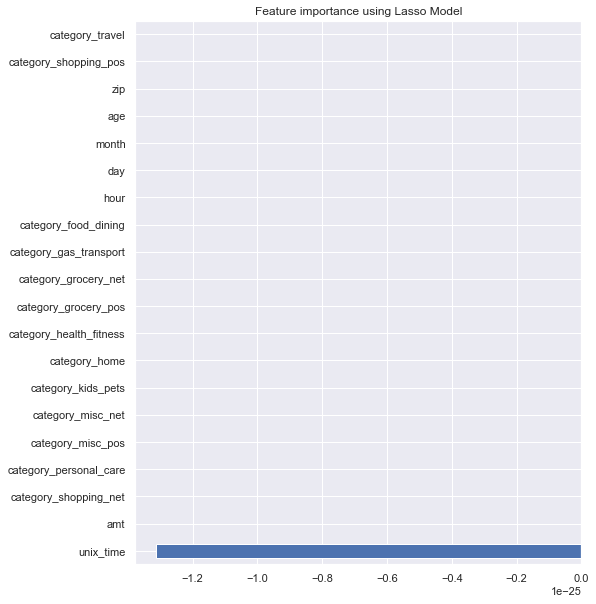

In [63]:
imp_coef = coef_dummy.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

The model picked out one feature that was relevant to the target attribute.

# Splitting the Data into train and test, to check the performance of the model.

In [65]:
# Using the data as it is without correcting the imbalance

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
model=LogisticRegression()
model.fit(train_X, train_y)
predicted=model.predict(val_X)
print('Classification report:\n', classification_report(val_y, predicted))
conf_mat = confusion_matrix(y_true=val_y, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Validation Data:', 1-round(val_y.sum()/len(val_y),4))


/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    260666
           1       0.00      0.00      0.00      1476

    accuracy                           0.99    262142
   macro avg       0.50      0.50      0.50    262142
weighted avg       0.99      0.99      0.99    262142

Confusion matrix:
 [[260666      0]
 [  1476      0]]
Share of Non-Fraud in Validation Data: 0.9944


/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



We have a very imbalanced data set as there are few fraud cases as compared to genuine transactions and hence to counter this imbalance, it's important to use the SMOTE (Synthetic Minority Oversampling Technique) method to resample the training dataset so that the model can be trained on more balanced data for better results.

In [66]:
method= SMOTE()
X_resampled, y_resampled = method.fit_resample(train_X, train_y)
model=LogisticRegression()
model.fit(X_resampled,y_resampled)
predicted=model.predict(val_X)
print('Classification report:\n', classification_report(val_y, predicted))
conf_mat = confusion_matrix(y_true=val_y, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(val_y.sum()/len(val_y),4))

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Classification report:
               precision    recall  f1-score   support

           0       0.99      0.51      0.67    260666
           1       0.01      0.49      0.01      1476

    accuracy                           0.51    262142
   macro avg       0.50      0.50      0.34    262142
weighted avg       0.99      0.51      0.67    262142

Confusion matrix:
 [[132645 128021]
 [   746    730]]
Share of Non-Fraud in Test Data: 0.9944


To evaluate fraud detection models, the concepts of sensitivity/recall and precision are very important. Recall is True Positives/(True Positives + False Negatives), which meaures how many fraud cases fly under the radar while precision (True Positives/(True Positives + False Positives)) evaluates how good the model is at generating as fewer false alarms as possible. For fraud detection, we want to prioritize high recall to leave out as few fraud cases as possible while also having a relatively high precision because too many false alarms can also be a problem!

In the Logistic Regression model above, the recall is around 0.75 and the general accuracy of the model is around 0.95, which is lower than the actual share of non-fraud cases in the testing dataset. Both metrics seem to suggest that the model does not add very much to detecting fraud. Moreover, the Precision of the model is only 0.05: too many false positives to be actually useful!

In [67]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_resampled,y_resampled)
predicted=model.predict(val_X)
print('Classification report:\n', classification_report(val_y, predicted))
conf_mat = confusion_matrix(y_true=val_y, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(val_y.sum()/len(val_y),4))

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Classification report:
               precision    recall  f1-score   support

           0       0.99      0.51      0.67    260666
           1       0.01      0.49      0.01      1476

    accuracy                           0.51    262142
   macro avg       0.50      0.50      0.34    262142
weighted avg       0.99      0.51      0.67    262142

Confusion matrix:
 [[132645 128021]
 [   746    730]]
Share of Non-Fraud in Test Data: 0.9944


In [68]:
# random forest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=5)
model.fit(X_resampled,y_resampled)
predicted=model.predict(val_X)
print('Classification report:\n', classification_report(val_y, predicted))
conf_mat = confusion_matrix(y_true=val_y, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)
print('Share of Non-Fraud in Test Data:', 1-round(val_y.sum()/len(val_y),4))

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/Users/nalyaka/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1858: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    260666
           1       0.88      0.78      0.83      1476

    accuracy                           1.00    262142
   macro avg       0.94      0.89      0.91    262142
weighted avg       1.00      1.00      1.00    262142

Confusion matrix:
 [[260501    165]
 [   318   1158]]
Share of Non-Fraud in Test Data: 0.9944


## **Conclusion**

The dataset was imbalanced and it guide us efficiently in giving the relevant features for anomaly detection. From the analysis done, the features to look out for anomaly detection are: 

- The state in which the card user is operating the transaction from.
- The time of transation with the peak hours of fraudulent transactions between 10PM and 3AM
- The peak days are Sunday and Mondays.
- The peak months for fraudulent transactions are Jan, Feb, Mar, Nov and Dec.
- Fraudulent transactions is highest in users between the ages of 45 and 50 years of age and 25 and 30 years of age.
- Shopping and grocery have the highest difference in percentage between the fraudulent and non fraudulent transactions.
- A large number of the fraudulent transactions are below 100 dollars and more of these fraudulent transactions are over 300 dollars.
- The dataset had a large range between the minimum and maximum values spreading across the fraudulent and non-fraudulent transactions which made it difficult on how to handle the outliers.

During feature transaformation, the model picked out one attribute, unix_time as the relevant feature which differs from what we see in the correlation matrix that grades the 'amt' attribute higher than the unix_time attribute. 

After running 4 models, the above metrics show that although the Random Forest model has a slightly lower recall, it has much better accuracy and precision! Although still in need of improvements, it serves as a way better basis than the Logistic Regression model above for future deployment.